In [ ]:
import numpy as np
import pandas as pd
from scipy import linalg as lg 
from scipy.linalg import svd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


# **Assignment 8**: TF-IDF + Eigen Vectors + Singular Value Decomposition
#### Emily Daskas

## Problem 1

Compute the SVD (Singular Value Decomposition) (3 separate matrices U,Sigma,V) of the following 2 rectangular matrices.

1. [[3 1 1] [−1 3 1]]

2. [[1 1 0] [1 −1 1]]

Verify that by multiplying (Matrix multiplication) the 3 SVD matrices will result in the original matrix.

In [ ]:
matrix_1 = np.array([[3,1,1],[-1,3,1]])
matrix_2 = np.array([[1,1,0],[1,-1,1]])

In [ ]:
def recreate_matrix(V, sigma, UStar):
  sigma_matrix = np.diag(sigma)

  sigma_matrix_extended = extended_sigma_matrix(sigma)
  
  z = np.zeros((1,2))
  r = np.dot(V, sigma_matrix_extended)
  r_extended = np.hstack((r, np.zeros((2,1))))

  recreated = np.dot(r_extended, UStar)
  
  return recreated

**1. [[3 1 1] [−1 3 1]]**

In [ ]:
V, sigma, UStar = svd(matrix_1)
print(V, "\n\n", sigma, "\n\n", UStar)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] 

 [3.46410162 3.16227766] 

 [[-0.40824829 -0.81649658 -0.40824829]
 [-0.89442719  0.4472136   0.        ]
 [-0.18257419 -0.36514837  0.91287093]]


In [ ]:
print("Recreated Matrix:\n", recreate_matrix(V, sigma, UStar))
print()
print("Original Matrix:\n", matrix_1)

Recreated Matrix:
 [[ 3.  1.  1.]
 [-1.  3.  1.]]

Original Matrix:
 [[ 3  1  1]
 [-1  3  1]]


**2. [[1 1 0] [1 −1 1]]**

In [ ]:
V, sigma, UStar = svd(matrix_2)
print(V, "\n\n", sigma, "\n\n", UStar)

[[ 0. -1.]
 [ 1.  0.]] 

 [1.73205081 1.41421356] 

 [[ 0.57735027 -0.57735027  0.57735027]
 [-0.70710678 -0.70710678  0.        ]
 [-0.40824829  0.40824829  0.81649658]]


In [ ]:
print("Recreated Matrix:\n", recreate_matrix(V, sigma, UStar))
print()
print("Original Matrix:\n", matrix_2)

Recreated Matrix:
 [[ 1.  1.  0.]
 [ 1. -1.  1.]]

Original Matrix:
 [[ 1  1  0]
 [ 1 -1  1]]


## Problem 2
Using the Singular Value Decomposition (SVD)principals, perform the Latent Semantics Analysis (LSA) of the following 6 documents. Divide these documents into 2 different topics.

1. 'runs'

2. 'runs pitcher innings'

3. 'pitcher'

4. 'touchdown'

5. 'quarterback'

6. 'touchdown quarterback'


In [ ]:
corpus = ['runs', 'runs pitcher innings', 'pitcher', 'touchdown', 'quarterback', 'touchdown quarterback']
cv = CountVectorizer()
bag_of_words = cv.fit_transform(corpus)


In [ ]:
df = pd.DataFrame(bag_of_words.toarray(), columns = cv.get_feature_names())
df.T

,0,1,2,3,4,5
innings,0,1,0,0,0,0
pitcher,0,1,1,0,0,0
quarterback,0,0,0,0,1,1
runs,1,1,0,0,0,0
touchdown,0,0,0,1,0,1


In [ ]:
def normalized(pt1):
  return pt1/np.linalg.norm(pt1)

In [ ]:
bag_of_words_array = bag_of_words.toarray()
bag_of_words_array

array([[0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1]])

In [ ]:
vectors_normalized = [normalized(i) for i in bag_of_words_array]
vectors_normalized

[array([0., 0., 0., 1., 0.]),
 array([0.57735027, 0.57735027, 0.        , 0.57735027, 0.        ]),
 array([0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 1.]),
 array([0., 0., 1., 0., 0.]),
 array([0.        , 0.        , 0.70710678, 0.        , 0.70710678])]


**1. Using the SK Learn CountVectorizer function,vectorize all the 6 documents in the corpus.  Compute the “cosine similarity” & “cosine distance” between all the 6 document’s normalized vectors**


In [ ]:
def cosine_similarity(pt1, pt2):
  return np.dot(pt1, pt2)

In [ ]:
num_docs = len(corpus)
cosine_similarity_matrix = np.zeros((num_docs, num_docs))
cosine_distance_matrix = np.zeros((num_docs, num_docs))

In [ ]:
for i in range(num_docs):
  for j in range(num_docs):
    cosine_similarity_matrix[i,j] = cosine_similarity(vectors_normalized[i], vectors_normalized[j])
    cosine_distance_matrix[i,j] = 1 - cosine_similarity_matrix[i,j]
    
print("Similarity Matrix:\n\n",cosine_similarity_matrix)
print()
print("Cosine Distance Matrix:\n\n",cosine_distance_matrix)

Similarity Matrix:

 [[1.         0.57735027 0.         0.         0.         0.        ]
 [0.57735027 1.         0.57735027 0.         0.         0.        ]
 [0.         0.57735027 1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.70710678]
 [0.         0.         0.         0.         1.         0.70710678]
 [0.         0.         0.         0.70710678 0.70710678 1.        ]]

Cosine Distance Matrix:

 [[ 0.          0.42264973  1.          1.          1.          1.        ]
 [ 0.42264973 -0.          0.42264973  1.          1.          1.        ]
 [ 1.          0.42264973  0.          1.          1.          1.        ]
 [ 1.          1.          1.          0.          1.          0.29289322]
 [ 1.          1.          1.          1.          0.          0.29289322]
 [ 1.          1.          1.          0.29289322  0.29289322  0.        ]]



**2. Compute the ‘Document Term Matrix’ (DTM) and ‘Term (Word) Document Matrix’ (TDM) using the document’s vectors.**


In [ ]:
TDM = bag_of_words.todense().T
print("TDM")
print(TDM)

TDM
[[0 1 0 0 0 0]
 [0 1 1 0 0 0]
 [0 0 0 0 1 1]
 [1 1 0 0 0 0]
 [0 0 0 1 0 1]]


In [ ]:
DTM = bag_of_words.todense()
print("DTM")
print(DTM)

DTM
[[0 0 0 1 0]
 [1 1 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 1 0 1]]


**3. Compute the ‘Singular Value Decomposition’ (SVD) matrix for both DTM (Document Term Matrix) & TDM (Term Document Matrix) computed in the previous step. Using only the first 2 eigen values from the SVD and the SK Learn TruncatedSVD function, compute the Truncated DTM and TDM.**

*TDM (Term Document Matrix)*


In [ ]:
np.set_printoptions(precision=8, suppress=True)
V, Sigma, UStar = svd(TDM)
print(V, "\n\n", sigma, "\n\n", UStar)

[[-0.45970084 -0.         -0.         -0.         -0.88807383]
 [-0.62796303  0.          0.          0.70710678  0.32505758]
 [ 0.         -0.70710678 -0.70710678  0.          0.        ]
 [-0.62796303  0.          0.         -0.70710678  0.32505758]
 [ 0.         -0.70710678  0.70710678  0.          0.        ]] 

 [1.73205081 1.41421356] 

 [[-0.32505758 -0.88807383 -0.32505758  0.          0.          0.        ]
 [-0.         -0.          0.         -0.40824829 -0.40824829 -0.81649658]
 [-0.         -0.          0.          0.70710678 -0.70710678  0.        ]
 [-0.70710678  0.          0.70710678  0.          0.          0.        ]
 [ 0.62796303 -0.45970084  0.62796303  0.          0.          0.        ]
 [ 0.          0.          0.         -0.57735027 -0.57735027  0.57735027]]


In [ ]:
sigma_sig_num = 2
svd_trunc = TruncatedSVD(n_components= sigma_sig_num)
lsa = svd_trunc.fit_transform(bag_of_words.todense().T)
print(lsa)

[[ 0.88807383 -0.        ]
 [ 1.21313142  0.        ]
 [ 0.          1.22474487]
 [ 1.21313142 -0.        ]
 [ 0.          1.22474487]]


*DTM (Document Term Matrix)*

In [ ]:
np.set_printoptions(precision=8, suppress=True)
V, Sigma, UStar = svd(DTM)
print(V, "\n\n", sigma, "\n\n", UStar)

[[-0.32505758  0.          0.         -0.70710678  0.62796303  0.        ]
 [-0.88807383  0.          0.          0.         -0.45970084  0.        ]
 [-0.32505758  0.          0.          0.70710678  0.62796303  0.        ]
 [ 0.          0.40824829 -0.70710678  0.          0.         -0.57735027]
 [ 0.          0.40824829  0.70710678  0.          0.         -0.57735027]
 [ 0.          0.81649658 -0.          0.          0.          0.57735027]] 

 [1.73205081 1.41421356] 

 [[-0.45970084 -0.62796303  0.         -0.62796303 -0.        ]
 [-0.         -0.          0.70710678  0.          0.70710678]
 [-0.         -0.          0.70710678  0.         -0.70710678]
 [ 0.          0.70710678  0.         -0.70710678  0.        ]
 [-0.88807383  0.32505758 -0.          0.32505758 -0.        ]]


In [ ]:
sigma_sig_num = 2
svd_trunc = TruncatedSVD(n_components = sigma_sig_num)
lsa = svd_trunc.fit_transform(bag_of_words.todense())
print(lsa)

[[ 0.62796303 -0.        ]
 [ 1.7156269  -0.        ]
 [ 0.62796303 -0.        ]
 [ 0.          0.70710678]
 [ 0.          0.70710678]
 [ 0.          1.41421356]]


**4. What are the topics on which LSA has divided these set of documents?**

Plot all the 6 Truncated vectors with the following specifications.
* X-axis: Truncated DTM/Topic-1 values
* Y-axis: Truncated DTM/Topic-2 values

Compute the ‘cosine similarity’ and ‘cosine distance’ using the Truncated SVD.

In [ ]:
num_docs = len(corpus)
cosine_similarity_matrix = np.zeros((num_docs, num_docs))
cosine_distance_matrix = np.zeros((num_docs, num_docs))

In [ ]:
for i in range(num_docs):
  for j in range(num_docs):
    cosine_similarity_matrix[i,j] = cosine_similarity(lsa[i], lsa[j])
    cosine_distance_matrix[i,j] = 1 - cosine_similarity_matrix[i,j]

print("Similarity Matrix:\n\n",cosine_similarity_matrix)
print()
print("Cosine Distance Matrix:\n\n",cosine_distance_matrix)

Similarity Matrix:

 [[ 0.39433757  1.07735027  0.39433757 -0.         -0.         -0.        ]
 [ 1.07735027  2.94337567  1.07735027  0.          0.          0.        ]
 [ 0.39433757  1.07735027  0.39433757 -0.         -0.         -0.        ]
 [-0.          0.         -0.          0.5         0.5         1.        ]
 [-0.          0.         -0.          0.5         0.5         1.        ]
 [-0.          0.         -0.          1.          1.          2.        ]]

Cosine Distance Matrix:

 [[ 0.60566243 -0.07735027  0.60566243  1.          1.          1.        ]
 [-0.07735027 -1.94337567 -0.07735027  1.          1.          1.        ]
 [ 0.60566243 -0.07735027  0.60566243  1.          1.          1.        ]
 [ 1.          1.          1.          0.5         0.5        -0.        ]
 [ 1.          1.          1.          0.5         0.5        -0.        ]
 [ 1.          1.          1.         -0.         -0.         -1.        ]]


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.DataFrame(lsa, columns = ['topic 1', 'topic 2'])
df['corpus'] = corpus
df

,topic 1,topic 2,corpus
0,0.628,-0.000,runs
1,1.716,-0.000,runs pitcher innings
2,0.628,-0.000,pitcher
3,0.000,0.707,touchdown
4,0.000,0.707,quarterback
5,0.000,1.414,touchdown quarterback


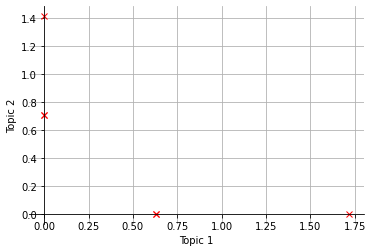

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.plot(df['topic 1'], df['topic 2'], 'x', c = 'r')
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.xlabel("Topic 1")
plt.ylabel("Topic 2")
plt.show()


**5. Which documents are more appropriate for ‘Topic-1’ and ‘Topic-2’?**

Documents 0, 1, and 2 are more appropriate for topic 1. Documents 3, 4, and 5 are strong for Topic 2.


**6. Which are the top 2 words that describe ‘Topic-1’ and ‘Topic-2’?**

Touchdown quarterback descrive topic 2, and runs pitcher describe topic 1.